# Analysis of the Runtime

In this notebook, we now analyze the performance of the different experiment-wares (in this case, SAT solvers) in terms of runtime.
More precisely, we only compare the experiment-wares based on the time they spent before completing their task (and thus, experiments in which the timeout is reached are considered unsuccessful, whatever their outcome).

## Imports

As usual, we start by importing the needed classes and functions from *Metrics-Wallet*.

In [1]:
from metrics.wallet import BasicAnalysis, DecisionAnalysis, LineType
from metrics.wallet import find_best_cpu_time_input

## Loading the data of the experiments

In a [dedicated notebook](load_experiments.ipynb), we already read and preprocessed the data collected during our experiments.
We can now simply reload the cached `BasicAnalysis` to retrieve it.

In [2]:
basic_analysis = BasicAnalysis.import_from_file('.cache')

Since we now want to perform a more specific analysis, we need to create a `DecisionAnalysis` that will provide methods dedicated to the analysis of the runtime of experiments.

In [3]:
analysis = DecisionAnalysis(basic_analysis=basic_analysis)

## Virtual Best Solver

The *Virtual Best Solver* (or VBS) is a solver that does not really exist.
Its runtime on a particular input is that of the fastest solver that was run on that input (even though one could define a VBS based on other criteria).
If one had an oracle to select the best solver for a particular input, and then run the solver on this input, its runtime would be that of the VBS.

In [4]:
analysis = analysis.add_virtual_experiment_ware(function=find_best_cpu_time_input, name='VBS')

We can now compute the contribution of each experiment-ware to the VBEW.

In [5]:
analysis.remove_experiment_wares(['VBS'])\
        .contribution_table(deltas=(1, 10))

,vbew simple,vbew 1s,vbew 10s,contribution
experiment_ware,,,,
kissat,191,191,185,103
glucose,58,54,50,10


Let us describe how to read this table.
In the first column, we can see for each solver the number of inputs for which the runtime of the solver is equal to that of the VBS.
In the second column (resp. third column), we can see for each solver the number of inputs for which the solver is at least 1 second faster (resp. 10 seconds faster) than any other solver.
Finally, in the fourth column, we can see the number of inputs for which this solver is the only one to run until completion (and thus, all other solvers reached the time limit on this input).

## Overview of the results

An overview of the results can easily be obtained using a so-called *cactus-plot*, which is a figure that is particularly popular in the SAT or CP communities.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cactus-plot'}, xlabel='Number of solved inputs', ylabel='Time (s)'>)

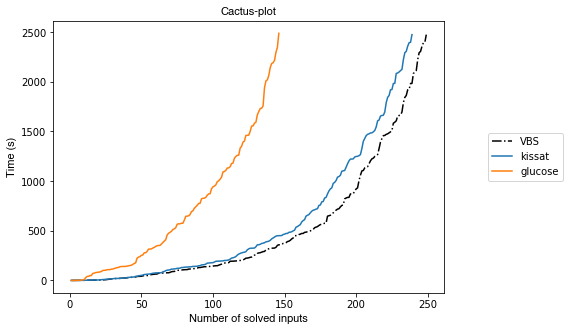

In [6]:
analysis.cactus_plot(
    cactus_col='cpu_time',
    show_marker=False,

    title='Cactus-plot',
    x_axis_name='Number of solved inputs',
    y_axis_name='Time (s)',

    color_map={ 'VBS': '#000000' },
    style_map={ 'VBS': LineType.DASH_DOT }
)

On this plot, we can easily read for each experiment-ware the number of inputs on which it can run until completion within a certain time limit.
In particular, the more an experiment-ware is to the right, the faster it is in general.

Here, we can easily see that *Kissat* is faster than *Glucose* on the considered instances.

Another way to get an overview of the results is to use the *cumulative distribution function* (CDF), which may be seen as a cactus-plot in which the axes have been switched.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'CDF'}, xlabel='Time (s)', ylabel='Number of solved inputs'>)

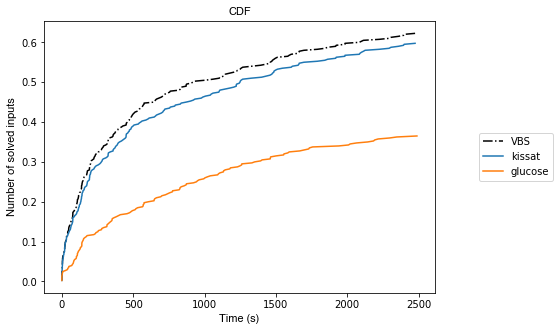

In [7]:
analysis.cdf_plot(
    cdf_col='cpu_time',
    show_marker=False,
    normalized=True,

    title='CDF',
    x_axis_name='Time (s)',
    y_axis_name='Number of solved inputs',

    color_map={ 'VBS': '#000000' },
    style_map={ 'VBS': LineType.DASH_DOT }
)

The interpretation of this plot is similar to that of a cactus-plot.
One of the advantage of this representation is that the order of the lines in the plot is the same as that of the legend, and thus best experiment-wares are on the top.
Additionally, it has more connections with the theory of statistics (while cactus-plots are not so meaningful outside the community).

Talking about statistics, box-plots can also be used to have an overview of the distribution of the runtime of the different experiment-wares.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Box-plots of the runtime'}>)

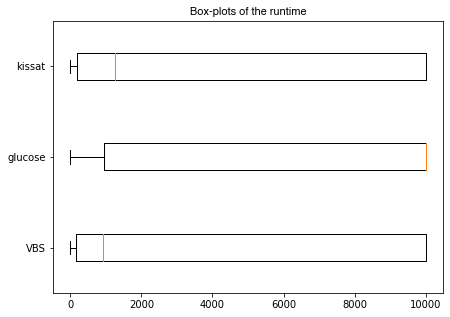

In [8]:
analysis.box_plot(
    box_by='experiment_ware',
    box_col='cpu_time',

    title='Box-plots of the runtime'
)

These boxplots confirm the observations made on the cactus plot and CDF plot above, especially as the median of the runtime of *Kissat* is around 100 seconds, while that of *Glucose* is at 10000 seconds, i.e., the time limit for the experiments. 

## Pairwise comparisons

Now that we have an overview of the results, we can make a pairwise comparison of the experiment-wares, to have a closer look at their behavior.
We can do so by drawing so-called *scatter-plots*.

First, we need to select two of the solvers among those run during the experiments.

In [9]:
xp_ware_x = 'kissat'
xp_ware_y = 'glucose'

Once the solvers have been selected, we can draw a scatter-plot that compares the runtime of both solvers on each input.
Here, each point is an input, and the x-axis and y-axis correspond to the runtime of `xp_ware_x` and `xp_ware_y` on this input, respectively.

(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Comparison between kissat and glucose'}, xlabel='kissat', ylabel='glucose'>)

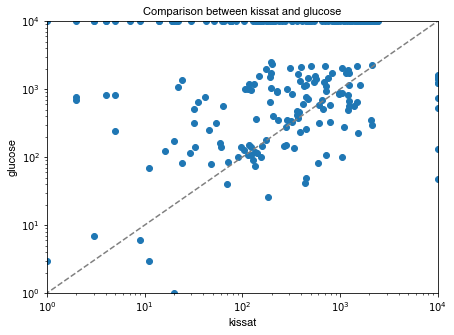

In [10]:
analysis.scatter_plot(
    xp_ware_x,
    xp_ware_y,

    scatter_col='cpu_time',
    title=f'Comparison between {xp_ware_x} and {xp_ware_y}',

    x_min=1,
    x_max=10000,
    y_min=1,
    y_max=10000,

    logx=True,
    logy=True
)

On this scatter-plot, we can mainly observe that *Glucose* reaches the time limit more often than *Kissat*.

While the analysis presented in this example only presents one scatter-plot for demonstration purposes, it may be useful for you to draw more scatter-plots, based on your needs.
In fact, all pairwise comparisons between two experiment-wares could be visualized using scatter-plots.